In [ ]:
# import library

import os
from shutil import copy
import xml.etree.ElementTree as ET
import xml
from xml.dom import minidom
import cv2

In [ ]:
with open(xmllspath, newline='') as f:
    data = f.read()


xmlls = data.split("\n")

while '' in xmlls:
    xmlls.remove('')

xmlls = [data+'.xml' for data in xmlls]

In [ ]:
count = 0
for idx, singleXml in enumerate(xmlls):
    xmlname = os.path.join(datapath,singleXml)
    doc = ET.parse(xmlname)
    root = doc.getroot()
    imagename = root.find('filename').text
    filepath = os.path.join('../../dataset/JPEGImages',imagename)
    objects = root.iter('object')

    for annotation in objects:
        name = annotation.find('name').text
        bndbox = annotation.find('bndbox')

        # x_l = int(bndbox.find('ymin').text)
        # y_b = int(bndbox.find('xmin').text)
        # x_r = int(bndbox.find('ymax').text)
        # y_u = int(bndbox.find('xmax').text)

        if name in VOCclass:
            count = count + 1

print(count)


In [ ]:
objects = root.iter('object')

In [ ]:
annotation = next(objects)

name = annotation.find('name').text
bndbox = annotation.find('bndbox')


x_l = int(bndbox.find('ymin').text)
y_b = int(bndbox.find('xmin').text)
x_r = int(bndbox.find('ymax').text)
y_u = int(bndbox.find('xmax').text)



In [ ]:
src = cv2.imread(filepath)
crop = src[x_l:x_r,y_b:y_u,:]

y = y_u-y_b
x = x_r-x_l
length = max(x, y)

top = int(length/2 - x/2)
bottom = int(length/2 - x/2)
left = int(length/2 - y/2)
right = int(length/2 - y/2)

borderType = cv2.BORDER_CONSTANT
crop = cv2.copyMakeBorder(crop, top, bottom, left, right, borderType)
crop = cv2.resize(crop,(256,256))

In [ ]:
from matplotlib import pyplot as plt
plt.imshow(cv2.cvtColor(crop, cv2.COLOR_BGR2RGB))

In [ ]:
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))

In [ ]:
xmlstr = minidom.parseString(ET.tostring(root)).toprettyxml(indent="   ")
print(xmlstr)

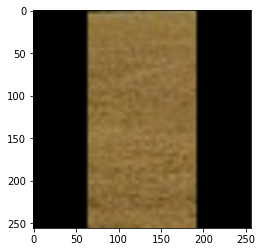

In [50]:
# Plot Cropped Images
import cv2
import matplotlib.pyplot as plt
count = count + 1

savedir = '../../dataset/BackgroundCrop'
imgname = 'BackgroundCrop_'+ str(count)+'.jpg'
cropimagepath = os.path.join(savedir,imgname)

src = cv2.imread(cropimagepath)
plt.imshow(cv2.cvtColor(src, cv2.COLOR_BGR2RGB))